In [1]:
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import glob 
import matplotlib.dates as mdates
import seaborn as sns
from scipy.stats import pearsonr

In [2]:
df_bitcoin=pd.read_csv(r"C:\Users\Usuario\Documents\Proyecto EDA\src\data\coin_Bitcoin.csv") 
df_USDC=pd.read_csv(r"C:\Users\Usuario\Documents\Proyecto EDA\src\data\coin_USDCoin.csv")

In [3]:
df_USDC.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,USD Coin,USDC,2018-10-09 23:59:59,1.00833,1.00003,1.00427,1.00686,108803.0,0.0
1,2,USD Coin,USDC,2018-10-10 23:59:59,1.01908,1.00397,1.00494,1.00962,711783.0,0.0
2,3,USD Coin,USDC,2018-10-11 23:59:59,1.03123,1.00173,1.00994,1.00978,4177290.0,0.0
3,4,USD Coin,USDC,2018-10-12 23:59:59,1.01871,1.00114,1.00861,1.01272,1322240.0,0.0
4,5,USD Coin,USDC,2018-10-13 23:59:59,1.02029,1.00355,1.01445,1.00743,698507.0,0.0


In [5]:
df_bitcoin['Date'] = pd.to_datetime(df_bitcoin['Date'])
df_USDC['Date'] = pd.to_datetime(df_USDC['Date'])

df_merged = pd.merge(df_bitcoin, df_USDC, on='Date', suffixes=('_btc', '_USDC'))
btc_precio = df_merged['High_btc']
USDC_precio = df_merged['High_USDC']

corr, _ = pearsonr(btc_precio, USDC_precio)
print(f"Coeficiente  entre BTC y USDC: {corr}")

Coeficiente  entre BTC y USDC: -0.4629542860158722


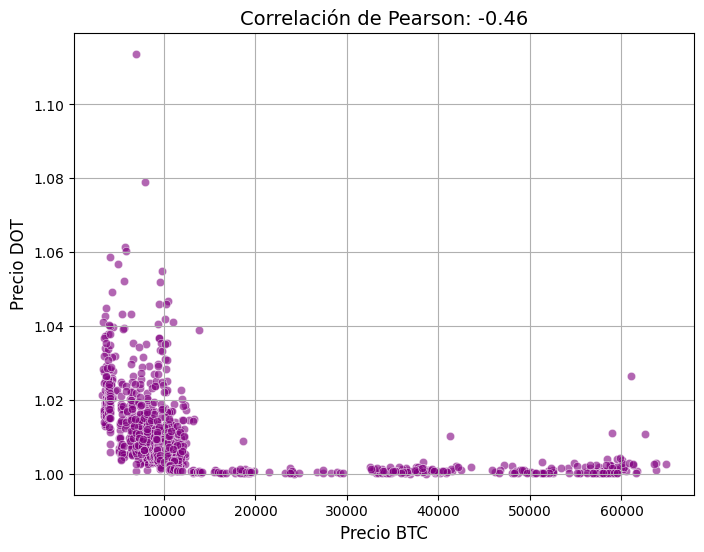

In [6]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=btc_precio, y=USDC_precio, color='purple', alpha=0.6)
plt.title(f'Correlación de Pearson: {corr:.2f}', fontsize=14)
plt.xlabel('Precio BTC', fontsize=12)
plt.ylabel('Precio DOT', fontsize=12)
plt.grid(True)
plt.show()

In [9]:
df_bitcoin['Date'] = pd.to_datetime(df_bitcoin['Date'])
df_USDC['Date'] = pd.to_datetime(df_USDC['Date'])

start_date = '2018-10-09 23:59:59'
df_btc_filtered = df_bitcoin[df_bitcoin['Date'] >= start_date]
df_USDC_filtered = df_USDC[df_USDC['Date'] >= start_date]

df_merged = pd.merge(df_bitcoin, df_USDC, on='Date', suffixes=('_btc', '_USDC'))
df_merged['btc_change'] = df_merged['Close_btc'].diff()
df_merged['USDC_change'] = df_merged['Close_USDC'].diff()

btc_up_dates = df_merged[df_merged['btc_change'] > 0]['Date']
USDC_up_dates = df_merged[df_merged['USDC_change'] > 0]['Date']

time_diffs = []
for btc_date in btc_up_dates:
    nearest_USDC_date = USDC_up_dates.iloc[(USDC_up_dates - btc_date).abs().argmin()]
    time_diff = abs((nearest_USDC_date - btc_date).days)
    time_diffs.append({'BTC Date': btc_date, 'USDC Date': nearest_USDC_date, 'Tiempo de diferencia (dias)': time_diff})

time_diffs_df = pd.DataFrame(time_diffs)
print(time_diffs_df)

               BTC Date           USDC Date  Tiempo de diferencia (dias)
0   2018-10-12 23:59:59 2018-10-12 23:59:59                            0
1   2018-10-13 23:59:59 2018-10-12 23:59:59                            1
2   2018-10-14 23:59:59 2018-10-14 23:59:59                            0
3   2018-10-15 23:59:59 2018-10-15 23:59:59                            0
4   2018-10-20 23:59:59 2018-10-21 23:59:59                            1
..                  ...                 ...                          ...
526 2021-06-29 23:59:59 2021-06-29 23:59:59                            0
527 2021-07-02 23:59:59 2021-07-01 23:59:59                            1
528 2021-07-03 23:59:59 2021-07-01 23:59:59                            2
529 2021-07-04 23:59:59 2021-07-05 23:59:59                            1
530 2021-07-06 23:59:59 2021-07-05 23:59:59                            1

[531 rows x 3 columns]
